In [16]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import seaborn as sns
import torch.utils.data as data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

In [2]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [3]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3699,7.6,0.30,0.37,1.60,0.087,27.0,177.0,0.99438,3.09,0.50,9.8,5
1261,7.3,0.19,0.68,1.50,0.050,31.0,156.0,0.99460,3.32,0.64,9.4,6
3483,6.1,0.36,0.26,8.15,0.035,14.0,88.0,0.99031,3.06,0.27,13.0,7
1335,5.7,0.21,0.24,2.30,0.047,60.0,189.0,0.99500,3.65,0.72,10.1,6
88,7.1,0.43,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1955,6.4,0.29,0.28,11.10,0.063,66.0,169.0,0.99730,2.89,0.57,9.0,5
4260,6.2,0.36,0.22,5.25,0.038,44.0,145.0,0.99184,3.22,0.40,11.2,6
832,7.3,0.30,0.34,2.70,0.044,34.0,108.0,0.99105,3.36,0.53,12.8,8
1283,8.0,0.45,0.36,8.80,0.026,50.0,151.0,0.99270,3.07,0.25,12.7,8


<Axes: >

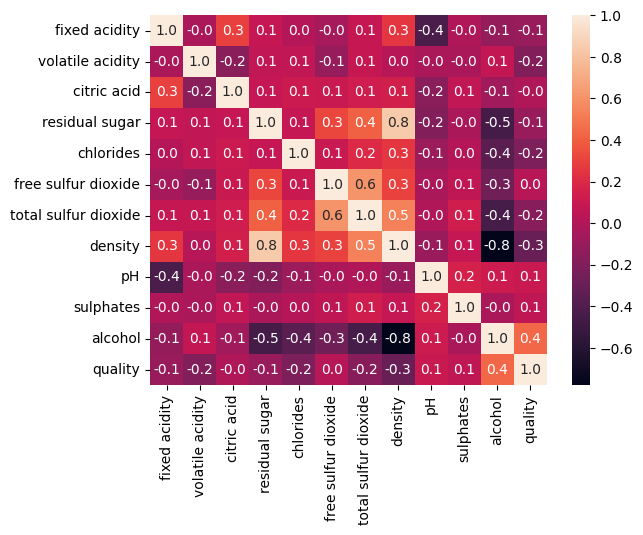

In [6]:
sns.heatmap(train.corr(), annot=True, fmt=".1f")

In [29]:
len(df["quality"].unique())

7

In [15]:
train_dataset = data.TensorDataset(torch.from_numpy(train.values[:,:-1]),torch.from_numpy(train.values[:,-1]))
next(iter(train_dataset))[0].shape

torch.Size([11])

## Check for missing values

In [17]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Normalize

In [61]:
train_x = train.drop(columns=["quality"])
train_y = train["quality"]
train_x_tensor = torch.from_numpy(train_x.values).to(torch.float32)
train_y_tensor = torch.from_numpy(train_y.values)

In [ ]:
mean_X = train_x_tensor.mean(dim=0)
std_X = train_x_tensor.std(dim=0)
train_dataset = data.TensorDataset(torch.from_numpy(train_x.values).to(torch.float32), torch.from_numpy(train_y.values))

In [57]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.forw = nn.Sequential(
            self._block(11, 32),
            self._block(32, 64),
            self._block(64, 128),
            nn.Linear(128, 7),
        )

    def _block(self, in_features, out_features):
        return nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.LeakyReLU()
        )

    def forward(self, x):
        return self.forw(x)

In [58]:
class Trainer:
    def __init__(self, train_dataset, model, batch_size, lr):
        self.model = model
        self.train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        self.criterion = nn.CrossEntropyLoss()

    def train(self, epochs):
        for epoch in range(epochs):
            for values, labels in self.train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(values)
                print(outputs.shape, labels.shape)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
            print(f"Epoch: {epoch}, loss: {loss}")

In [56]:
model = Model()
trainer = Trainer(train_dataset, model, 32, 3e-4)
trainer.train(20)

torch.Size([32, 7]) torch.Size([32])


/home/atarsander/anaconda3/envs/autodoppelganger/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


IndexError: Target 7 is out of bounds.